# Deep Learning - Day 4 - Your First RNN

### Exercise objectives:

- Better understand temporal data
- Build your first Recurrent Neural Network


<hr>
<hr>

You will see along the different exercises that temporal data can be of very different type - and thus of different complexity. For that reason, let's start with simple sequences of observations.


# The data


The data describes the evolution of the employment status of a person, year after year: each sequence corresponds to 6 consecutive years, where each year describes a job (let's say for the sake of simplicity that it corresponds to the job on the 1st of January). And each job is described by
- the salary,
- the number of persons under one's responsability,
- the size of the company. 

For instance, if at a given year, you earn 2500 ($, €, ¥, ...), you have 4 persons under your responsibility and the company has 200 employes, then it corresponds to the vector (2.5, 4, 200) - note here that the salary is devided by 1000 to have something normalized. And you have this observation for 10 consecutive years.

So, from this 25000 sequences, each of 10 consecutive observations, the goal is to predict the salary on the 11th year based on the past observations. 

❓ **Question** ❓ Load the data

In [2]:
import numpy as np

X = np.load('X.npy')
y = np.load('y.npy')

In [3]:
X.shape

(25000, 10, 3)

In [4]:
X[1]

array([[ 1.53 , 15.   , 48.   ],
       [ 1.682, 16.   , 48.   ],
       [ 1.88 , 28.   , 48.   ],
       [ 4.169, 41.   , 48.   ],
       [ 5.027, 41.   , 48.   ],
       [ 5.17 , 47.   , 48.   ],
       [ 6.291, 47.   , 48.   ],
       [ 6.433, 47.   , 48.   ],
       [ 6.562, 47.   , 48.   ],
       [ 6.729, 47.   , 48.   ]], dtype=float32)

Let's check the data here.

❓ **Question** ❓ Take some sequences and plot the evolution of their salaries, of the persons under their responsibility and of the company sizes. You might see some correlation between the three variables.

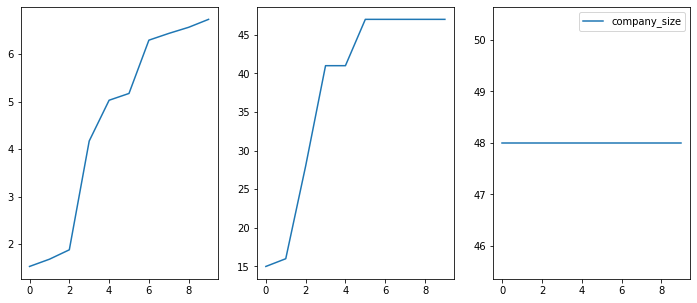

In [5]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12, 5))
ax1.plot(X[1][:,0], label ='salary')
ax2.plot(X[1][:, 1], label ='reports')
ax3.plot(X[1][:, 2], label ='company_size')
plt.legend()

❓ **Question** ❓ Plot the distribution of all the salaries, persons under one's responsibility, and company sizes to get a better understanding of the variability of observations.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa589c02e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa589c11580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa589c02b20>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa589c11c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa589c11fa0>],
 'means': []}

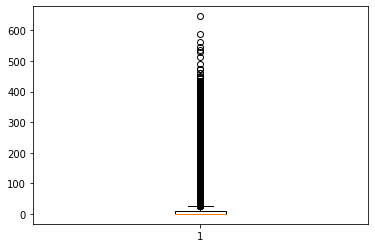

In [6]:
reports = np.unique(X[:,:, 1])
plt.boxplot(reports)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa589b68c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa589b75310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa589b688b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa589b759d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa589b75d30>],
 'means': []}

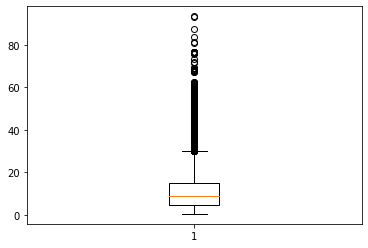

In [7]:
salaries = np.unique(X[:,:, 0])
plt.boxplot(salaries)

❓ **Question** ❓  Split your dataset between a train and test set (80/20%)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
y.shape

(25000,)

# The model

Now, you will create your first Recurrent Neural Network.

❓ **Question** ❓ Write a model that has: 
- a `SimpleRNN` layer with 20 `units` - don't forget to choose the `tanh` activation function
- a Dense layer with 10 neurons
- a last Dense layer specific to your task (predict a salary)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.SimpleRNN(units=20, activation='tanh'))
model.add(layers.Dense(10, activation = 'relu'))
model.add(layers.Dense(1, activation='linear'))


❓ **Question** ❓ Compile your model. Remember to first use the `rmsprop` optimizer (instead of Adam).

In [32]:
model.compile(loss='mse', optimizer='rmsprop', metrics='mae')

❓ **Question** ❓ Run your model on your data. Use a validation split of 20% and an early stopping criterion (patience=5).

In [33]:
model.fit(X_train, y_train, batch_size=32, epochs = 4)

Epoch 1/4
625/625 [==============================] - 2s 4ms/step - loss: 16.3190 - mae: 1.9071
Epoch 2/4
625/625 [==============================] - 2s 4ms/step - loss: 4.4122 - mae: 0.9683
Epoch 3/4
625/625 [==============================] - 2s 3ms/step - loss: 3.1406 - mae: 0.7995
Epoch 4/4
625/625 [==============================] - 2s 3ms/step - loss: 2.5695 - mae: 0.7516


❓ **Question** ❓ Evaluate your model on the test set

In [34]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 0s 3ms/step - loss: 2.5694 - mae: 0.6972


[2.569394111633301, 0.6971721649169922]

# Baseline model


### Standard problems

As for any model, you should quickly get an idea of the performance of your model. For instance, in case of a 2-class equally-balanced classification, the worst accuracy is of 50%. If the classe is unbalanced, your worst classification consists in always predicting the most present class. Similar ideas go for multiclass classification.

In the case of a regression model, a baseline prediction for `y_test` could be to predict the average of `y_train`.

### Temporal problems

With temporal data, it often happens that you try to predict a value that you have already seen in the past: here, the salary. In that case, a baseline model could be to predict a value based on these past occurencies. For instance, here, you could predict that the 11-th salary is equal to the 10-th salary.

❓ **Question** ❓ Compute the Mean Absolute Error of a model that would predict that the salary remains constant between the 10-th and 11-th year and compare it to your RNN.

In [14]:
y_pred = X[:, 9, 0]
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, y_pred)

0.5951943998979569

You have probably seen that your prediction is a little bit better than the baseline model

# A bit more complex model

❓ **Question** ❓ Write the exact same model, but with a `LSTM` instead of a `SimpleRNN` and evaluate your performance on the test set

In [35]:
model = Sequential()
model.add(layers.LSTM(units=20, activation='tanh'))
model.add(layers.Dense(10, activation = 'relu'))
model.add(layers.Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop', metrics='mae')
model.fit(X_train, y_train, batch_size=32, epochs = 5)

Epoch 1/5
625/625 [==============================] - 4s 6ms/step - loss: 20.5721 - mae: 1.9389
Epoch 2/5
625/625 [==============================] - 3s 5ms/step - loss: 4.0022 - mae: 0.7603
Epoch 3/5
625/625 [==============================] - 3s 5ms/step - loss: 2.5431 - mae: 0.6615
Epoch 4/5
625/625 [==============================] - 3s 5ms/step - loss: 2.1502 - mae: 0.6153
Epoch 5/5
625/625 [==============================] - 3s 6ms/step - loss: 1.8788 - mae: 0.5914


In [36]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 0s 3ms/step - loss: 1.8279 - mae: 0.5830


[1.8278906345367432, 0.5829674601554871]

# Well done!

## You now know how to run RNN on sequence data!

Note: The sequences you worked with are totally fake. In case you need to train and reproduce similar data, you can find bellow the functions that have been used to simulate this data.

In [37]:
def create_sequences(number):
    X, y = [], []
    
    for i in range(number):
        x_i, y_i = create_individual_sequence(10)
        X.append(x_i)
        y.append(y_i)
        
    return np.array(X), np.array(y)
            
def create_individual_sequence(length):
    company_sizes = []
    nb_persons = []
    salaries = []
    
    
    # Education level
    educ_level = [max(0, int(np.random.normal(10, 2)))]*length
    
    # Company size
    current_size = int(1 + np.random.beta(.4, 4)*500)
    for i in range(length):
        if not np.random.randint(4): # Change 1 out of 3 possibilities 
            current_size = int(max(1, np.random.normal(current_size, 50)))
        company_sizes.append(current_size)
    
    # Number of persons
    nb_iter = np.random.beta(.15, 4)*300
    for i in range(length):
        if not np.random.randint(2): # Change 1 out of 2 possibilities
            R_1 = np.random.beta(0.5, 8)*3
            nb_iter = nb_iter + max(-2, R_1*company_sizes[i] + np.random.randint(-2, 2))
            nb_iter = max(0, nb_iter)
            nb_iter = int(min(company_sizes[i]-1, nb_iter))
        nb_persons.append(nb_iter)
        
    
    # Salary
    salary_iter = max(800, int(np.random.normal(1200, 300)+ 0.05*company_sizes[0] +  np.random.normal(40, 400)))
    salaries.append(salary_iter)
    for i in range(1, length + 1):
        R_1 = np.random.normal(100, 50)
        change_person = nb_persons[i-1] - nb_persons[i-2]
        change_company = max(0, company_sizes[i-1] - company_sizes[i-2])
        salary_iter = salary_iter + 0.05*change_company + change_person*R_1 + np.random.normal(100, 50)
        salary_iter = max(int(salary_iter), 500)
        
        salaries.append(salary_iter)

    y = salaries[-1]/1000
    salaries = [_/1000 for _ in salaries[:-1]]
    
    return np.array([salaries, nb_persons, company_sizes]).T, y

In [38]:
#X, y = create_sequences(25000)

#np.save('X', X.astype(np.float32))
#np.save('y', y)